# Construcción del Modelo Final

Inicialmente se planteó evaluar diferentes modelos para seleccionar uno con un score alto. Los modelos planteados fueron KNN, Random Forest, Ada Boost, Gradient Boosting, XGBoost. Se obtuvieron 0.81-4.5, 0.79-4.6, 0.53-7.11, 0.80-5.49 y 0.89-3.42 de score y rmse respectivamente. Por otro lado debido a que Sklearn recomendaba usar otros modelos como Light Gradient Boosting Machine y Hist Gradient Boosting para datos grandes, se realizaron pruebas con estos modelos obteniento un score y rmse máximo de  0.8974-3.31 y 0.8909-3.41 respectivamente. Por lo tanto nuestro mejor modelo es la de Light Gradient Boosting.  


# Gradient Boosting

Este es el modelo base de Gradient Boosting Regressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dtypes = {
      'key': 'object',
      'fare_amount': 'float64',
      'pickup_datetime': 'object',
      'pickup_longitude': 'float64', 
      'pickup_latitude': 'float64',
      'dropoff_longitude': 'float64',
      'dropoff_latitude': 'float64',
      'passenger_count': 'int64',
      'day':'int64',
      'week':'int64',
      'trayecto_nocturno':'int64',
      'hora_punta':'int64',
      'year':'int64',
      'aeropuerto':'int64',
      'day_of_month':'int64'
      
    
}
df = pd.read_csv("train_data.csv", dtype=dtypes)
df = df[['key', 'pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'day', 'hour', 'week', 'trayecto_nocturno','hora_punta','year','aeropuerto','day_of_month','fare_amount']]
df.head()

,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,day,hour,week,trayecto_nocturno,hora_punta,year,aeropuerto,day_of_month,fare_amount
0,2014-02-19 07:22:00.00000074,2014-02-19 07:22:00 UTC,40.760465,-73.986430,40.737075,-73.988990,1,2,7.366667,8,0,0,2014,0,19,12.50
1,2014-12-06 20:36:22.0000008,2014-12-06 20:36:22 UTC,40.751902,-73.979815,40.755481,-73.979446,1,5,20.600000,49,1,1,2014,0,6,4.00
2,2014-02-19 16:03:00.000000160,2014-02-19 16:03:00 UTC,40.752422,-73.976075,40.759285,-73.981082,1,2,16.050000,8,0,1,2014,0,19,5.50
3,2015-06-21 21:46:34.0000001,2015-06-21 21:46:34 UTC,40.717667,-74.010483,40.660366,-73.985771,1,6,21.766667,25,1,0,2015,0,21,22.54
4,2015-01-11 03:15:38.0000001,2015-01-11 03:15:38 UTC,40.738720,-73.983330,40.847225,-73.933197,1,6,3.250000,2,1,0,2015,0,11,58.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11773348 entries, 0 to 11773347
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   pickup_datetime    object 
 2   pickup_latitude    float64
 3   pickup_longitude   float64
 4   dropoff_latitude   float64
 5   dropoff_longitude  float64
 6   passenger_count    int64  
 7   day                int64  
 8   hour               float64
 9   week               int64  
 10  trayecto_nocturno  int64  
 11  hora_punta         int64  
 12  year               int64  
 13  aeropuerto         int64  
 14  day_of_month       int64  
 15  fare_amount        float64
dtypes: float64(6), int64(8), object(2)
memory usage: 1.4+ GB


In [ ]:
df.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,day,hour,week,trayecto_nocturno,hora_punta,year,aeropuerto,day_of_month,fare_amount
count,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07,1.177335e+07
mean,4.075075e+01,-7.397478e+01,4.075136e+01,-7.397370e+01,1.693342e+00,3.066519e+00,1.402191e+01,2.209214e+01,3.716792e-01,2.708076e-01,2.014319e+03,2.106478e-02,1.559621e+01,1.271158e+01
std,4.082624e-02,6.271784e-02,3.470967e-02,4.844846e-02,1.352072e+00,1.957809e+00,6.516397e+00,1.422517e+01,4.832534e-01,4.443769e-01,4.660411e-01,1.436003e-01,8.721748e+00,1.033571e+01
min,7.296320e-01,-1.219261e+02,3.263495e+01,-1.219261e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,0.000000e+00,1.000000e+00,2.500000e+00
25%,4.073669e+01,-7.399214e+01,4.073548e+01,-7.399140e+01,1.000000e+00,1.000000e+00,9.433333e+00,1.000000e+01,0.000000e+00,0.000000e+00,2.014000e+03,0.000000e+00,8.000000e+00,6.500000e+00
50%,4.075341e+01,-7.398202e+01,4.075397e+01,-7.398019e+01,1.000000e+00,3.000000e+00,1.465000e+01,2.000000e+01,0.000000e+00,0.000000e+00,2.014000e+03,0.000000e+00,1.600000e+01,9.500000e+00
75%,4.076764e+01,-7.396800e+01,4.076867e+01,-7.396394e+01,2.000000e+00,5.000000e+00,1.956667e+01,3.300000e+01,1.000000e+00,1.000000e+00,2.015000e+03,0.000000e+00,2.300000e+01,1.450000e+01
max,5.537514e+01,-1.666700e-02,4.993002e+01,-6.523427e+01,6.000000e+00,6.000000e+00,2.398333e+01,5.200000e+01,1.000000e+00,1.000000e+00,2.015000e+03,1.000000e+00,3.100000e+01,7.390000e+01


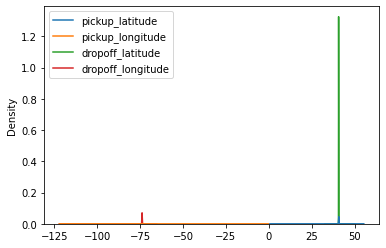

In [ ]:
import seaborn as sns
data = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
sns.kdeplot(data=data)

## Estandarización y normalización de la data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
standar = StandardScaler()
normal = MinMaxScaler()
numericasReales = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','hour']
numericasBinarias = ['trayecto_nocturno','hora_punta','year','aeropuerto']
numericas = ['passenger_count','week','day','day_of_month']
data1 = pd.DataFrame(standar.fit_transform(df[numericasReales]), columns = numericasReales)
data2 = pd.DataFrame(normal.fit_transform(df[numericas]), columns = numericas)
dff = pd.concat([data1,data2,df[numericasBinarias]],axis=1)

In [ ]:
dff.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,hour,passenger_count,week,day,day_of_month,trayecto_nocturno,hora_punta,year,aeropuerto
0,0.238000,-0.185771,-0.411444,-0.315620,-1.021307,0.0,0.137255,0.333333,0.600000,0,0,2014,0
1,0.028257,-0.080298,0.118840,-0.118627,1.009467,0.0,0.941176,0.833333,0.166667,1,1,2014,0
2,0.040994,-0.020666,0.228435,-0.152395,0.311229,0.0,0.137255,0.333333,0.600000,0,1,2014,0
3,-0.810306,-0.569279,-2.621461,-0.249181,1.188503,0.0,0.470588,1.000000,0.666667,1,0,2015,0
4,-0.294625,-0.136339,2.762029,0.835975,-1.653047,0.0,0.019608,1.000000,0.333333,1,0,2015,0


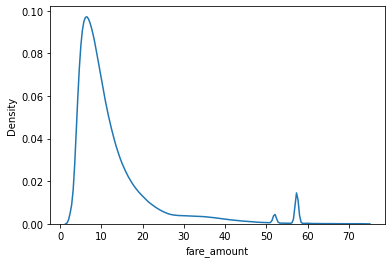

In [ ]:
sns.kdeplot(data=df['fare_amount'])

## Separación de la data

In [ ]:
from sklearn.model_selection import train_test_split
predictors = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'day', 'hour', 'week', 'trayecto_nocturno','hora_punta','year','aeropuerto','day_of_month']
outcome = ['fare_amount']

### Sin Preprocesamiento

In [ ]:
X = dff[predictors]
y = df[outcome]
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)

### Data con Preprocesamiento

In [ ]:
X2 = dff[predictors]
y2 = df[outcome]
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(X2,y2)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_val2, y_train_val2)

## Modelo

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Primero probamos el modelo con la data sin preprocesar

In [ ]:

gbrt = GradientBoostingRegressor()
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(np.sqrt(np.mean(errors)))

5.49494370735245


In [ ]:
gbrt.score(X_test,y_test)

0.8046842004090073

Luego probamos el modelo con la data preprocesada

In [ ]:
gbrt2 = GradientBoostingRegressor()
gbrt2.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(y_test2, y_pred) for y_pred in gbrt2.staged_predict(X_test2)]

In [ ]:
print(np.sqrt(np.mean(errors)))

5.50430130454259


In [ ]:
gbrt2.score(X_test2,y_test2)

0.802611129674834

Notamos que el modelo sin preprocesar obtuvo un mayor score (80.26%) comparado con el modelo entrenado usando data preprocesada. Sin embargo, este modelo no permite trabajar con datos muy grandes debido a su lentitud. Debido a esto Sklearn sugiere usar el modelo Light Gradient Boosting Machine (LightGBM), este modelo realiza parte del proceso de manera distribuida, por lo que es mucho más rápido que el modelo básico.

Mediante este modelo también evaluaremos el modelo usando data que ha sido preprocesada y data sin preprocesamiento, esto debido a que en el modelo básico se observó que obtuvo un mejor score con la data sin preprocesar

# Light Gradient Boosting Machine

LightGBM es un marco de mejora de gradientes que utiliza algoritmos de aprendizaje basados ​​en árboles. Está diseñado para ser distribuido y eficiente con las siguientes ventajas:

* Velocidad de entrenamiento más rápida y mayor eficiencia.
* Menor uso de memoria.
* Mejor precisión.
* Soporte de aprendizaje en paralelo, distribuido y GPU.
* Capaz de manejar datos a gran escala.

LightGBM divide el árbol en forma de hojas en lugar de otros algoritmos de impulso que crecen a nivel del árbol. Elige la hoja con la máxima pérdida delta para crecer. Dado que la hoja es fija, el algoritmo de hoja tiene una pérdida menor en comparación con el algoritmo de nivel. El crecimiento de los árboles por hojas puede aumentar la complejidad del modelo y puede conducir a un sobreajuste en pequeños conjuntos de datos.

A continuación se muestra una representación esquemática del crecimiento de los árboles en forma de hoja: 



Los hiperparámetros más influyentes son: 
  max_depth, n_estimators y learning_rate.


## Importacion de data y funciones

Se tomaron los siguientes conjuntos de características, siendo:
* features: Conjunto de caracteristicas relevantes de la data original en el modelo con data.
* features2: Conjunto de caracteristicas más relevantes de la data final en el modelo con data.
* features3: Conjunto de caracteristicas relevantes de la data final en el modelo con data.

In [ ]:
#features = ['pickup_latitude',	'pickup_longitude',	'dropoff_latitude',	'dropoff_longitude'] 
features2 = ['pickup_latitude',	'pickup_longitude',	'dropoff_latitude',	'dropoff_longitude', 'hour']
#features3 = ['pickup_latitude',	'pickup_longitude',	'dropoff_latitude',	'dropoff_longitude', 'week', 'hour', 'day','hora_punta']

X = data[features2]

#X = data.drop(columns=['fare_amount','key',	'pickup_datetime']) #Conjunto de caracteristicas relevantes del modelo final
y = data['fare_amount']

print(X.shape)
print(y.shape)

(11773348, 5)
(11773348,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8241343, 5)
(8241343,)
(3532005, 5)
(3532005,)


In [ ]:
import matplotlib.pyplot as plt

def dibuja_caracteristicas_importantes(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

### Prueba con un modelo

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm.sklearn import LGBMRegressor
import multiprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import random

Conjunto de datos sin preprocesamiento.

Usamos todas las caracteristicas con el mejor modelo resultado de las busquedas aleatorias previas.

In [ ]:
#lgbm = LGBMRegressor(boosting_type='gbdt',  max_depth= 5, learning_rate=0.1, n_estimators=1000, subsample=0.5,random_state=1, n_jobs=multiprocessing.cpu_count() - 1)
lgbm = LGBMRegressor(boosting_type='gbdt',  max_depth= 7, learning_rate=0.1, n_estimators=1000, subsample=0.5,random_state=1, n_jobs=multiprocessing.cpu_count() - 1)
lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
score = lgbm.score(X_test, y_test)
print("score :",score)

y_pred = lgbm.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

score : 0.8974132606927763
MSE : 10.956263811435077
RMSE : 3.3100247448372766
r2_score : 0.8974132606927763


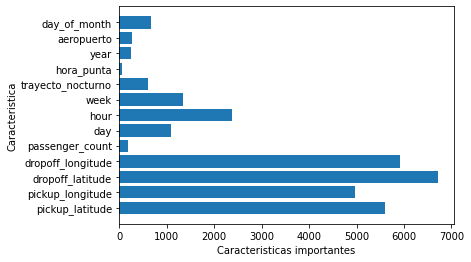

In [ ]:
dibuja_caracteristicas_importantes(lgbm)

Conjunto de datos con preprocesamiento.

Usamos las caracteristicas mas importantes resultado de anteriores ejecuciones con el mejor modelo resultado de las busquedas aleatorias previas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
lgbm_s = LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
lgbm_s.fit(X_train_s, y_train)

LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
score = lgbm_s.score(X_test_s, y_test)
print("score :",score)

y_pred = lgbm_s.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

score : 0.8933640492833465
MSE : 254.90746894841033
RMSE : 15.965821900184478
r2_score : -1.386774042180087


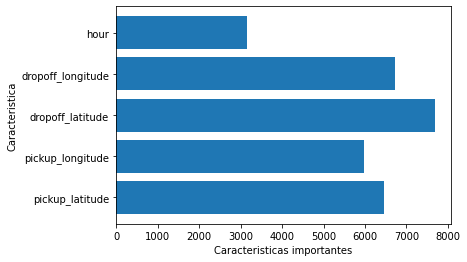

In [ ]:
dibuja_caracteristicas_importantes(lgbm_s)

### Busqueda aleatoria

In [ ]:
boosting_type = ['gbdt']
best_score = -1
best_model = LGBMRegressor()

for i in range(12):
    n_estimators= random.choice([100, 500, 750 ,1000])
    max_depth = random.choice([3, 5, 7])
    subsample = random.choice([0.5, 1])
    learning_rate = random.choice([0.001, 0.01, 0.1])

    model = LGBMRegressor(boosting_type=boosting_type,  max_depth= max_depth, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample,random_state=1, n_jobs=multiprocessing.cpu_count() - 1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score 
        best_model = model
        print("Mejor score: {} \nModelo: {}".format(score, model))

Mejor score: 0.6488191195415001 
Modelo: LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.001, max_depth=7,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
Mejor score: 0.8888296855530071 
Modelo: LGBMRegressor(boosting_type=['gbdt'], class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=39, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.5, subsample_for_bin=200000, subsample_freq=0)
Mejor score: 

In [ ]:
#res = cross_validate(best_model, X_train, y_train)
#print(pd.DataFrame(res))
score = model.score(X_train, y_train)
print("Score entrenamiento: ",score)

score = model.score(X_test, y_test)
print("Score prueba: ",score)

y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = metrics.r2_score(y_test, y_pred)
print("r2_score :", r2)

# comp = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
# print(comp)

Score entrenamiento:  0.85660492760096
Score prueba:  0.8559937145645446
MSE : 15.379871359498152
RMSE : 3.921717909220161
r2_score : 0.8559937145645446


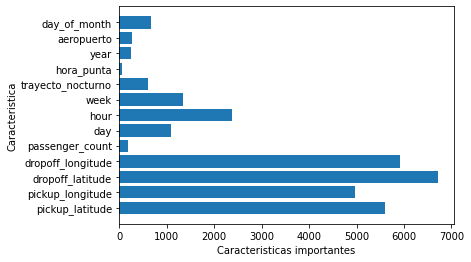

In [ ]:
dibuja_caracteristicas_importantes(best_model)

### GridSearchCV

Se utilizó `GridSearchCV()` con el fin de encontrar el mejor modelo para este conjunto de datos. Se tomó como conjunto de entrenamiento las caracteristicas más importantes

In [ ]:
param_grid = {'n_estimators'     : [500, 750, 1000],
              'max_depth'        : [3, 5, 7],
              'learning_rate'    : [0.001, 0.01, 0.1],
             }

grid = GridSearchCV(
        estimator  = LGBMRegressor(boosting_type = 'gbdt', random_state = 1 , n_jobs = multiprocessing.cpu_count() - 1),
        param_grid = param_grid,
        return_train_score = True,
        verbose = 2
       )

grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  27.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.4s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.3s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.2s
[CV] learning_rate=0.001, max_depth=3, n_estimators=500 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=500, total=  26.4s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, total=  39.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, total=  38.9s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............
[CV]  learning_rate=0.001, max_depth=3, n_estimators=750, total=  39.0s
[CV] learning_rate=0.001, max_depth=3, n_estimators=750 ..............

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 144.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=39, num_leaves=31,
                                     objective=None, random_state=1,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [500, 750, 1000]},
         

In [ ]:
score = grid.score(X_train, y_train)
print("Score entrenamiento: ",score)

score = grid.score(X_test, y_test)
print("Score prueba: ",score)

y_pred = grid.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = metrics.r2_score(y_test, y_pred)
print("r2_score :", r2)

Score entrenamiento:  0.8954485820575061
Score prueba:  0.8934558041641824
MSE : 11.378920170748994
RMSE : 3.373265505522652
r2_score : 0.8934558041641822
